<a href="https://colab.research.google.com/github/CrucifierBladex/superconductivity_critical_temp_prediction/blob/main/superconduction_ml_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
df=pd.read_csv('/content/train.csv')

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355

In [3]:
df.shape

(1766, 82)

In [4]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 294kB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [5]:
import sweetviz as sv


SWEETVIZ TOOL FOR AUTOMATED EDA 


In [7]:
report=sv.analyze(df)

In [8]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               5289 non-null   int64  
 1   mean_atomic_mass                 5289 non-null   float64
 2   wtd_mean_atomic_mass             5289 non-null   float64
 3   gmean_atomic_mass                5289 non-null   float64
 4   wtd_gmean_atomic_mass            5289 non-null   float64
 5   entropy_atomic_mass              5289 non-null   float64
 6   wtd_entropy_atomic_mass          5289 non-null   float64
 7   range_atomic_mass                5289 non-null   float64
 8   wtd_range_atomic_mass            5289 non-null   float64
 9   std_atomic_mass                  5289 non-null   float64
 10  wtd_std_atomic_mass              5288 non-null   float64
 11  mean_fie                         5288 non-null   float64
 12  wtd_mean_fie        

In [8]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,...,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,5.051617,85.359675,61.870362,64.436078,42.831998,1.390051,1.340129,147.125510,23.961230,53.316309,51.439595,774.469879,949.034873,728.018567,889.815613,1.538260,1.046314,801.270405,589.856557,292.630942,322.010953,161.434406,122.479877,140.894436,101.133229,1.498718,1.411136,192.753026,36.828404,67.927005,71.278501,4893.681410,3571.900668,1019.748344,457.331077,1.245759,0.985997,9775.284982,2099.472062,3593.839259,...,101.505972,45.489038,74.863021,1.269050,0.855628,137.281545,68.835111,54.453026,50.967994,8.534263,6.411138,4.500250,2.805122,1.331577,1.159213,16.261425,3.510275,5.686914,5.561010,107.112787,100.256709,12.144357,7.633098,0.690210,0.430754,393.767896,87.731258,151.887032,155.223626,2.440504,2.230092,2.337565,2.171946,1.560821,1.306433,1.778366,0.955611,0.710048,0.513797,61.964198
std,0.893212,14.375375,16.342660,10.529585,15.036464,0.183704,0.200212,33.556814,11.657195,12.207399,10.992177,43.669732,109.764881,40.282067,96.609969,0.187829,0.267717,47.963828,196.059370,28.161712,45.932847,11.488948,22.709345,10.224070,25.379342,0.197540,0.180576,17.052170,15.985382,8.676089,9.566833,865.928281,1106.215192,338.383220,788.377707,0.203488,0.210052,1812.475037,677.758311,686.306595,...,15.806956,15.401886,21.126040,0.158297,0.176289,29.894863,17.012895,9.568474,8.317888,4.123610,7.588955,1.336182,6.966333,0.226923,0.203896,13.211597,7.624486,5.275668,2.756326,17.395272,38.287016,7.726242,16.177443,0.288149,0.251232,43.688524,34.3

CORRELATION TABLE

In [9]:
df.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,0.211003,0.186711,0.264639,0.169289,0.944019,0.605072,0.510466,0.108265,0.310185,0.292646,-0.368813,-0.184527,-0.180152,-0.159947,0.994866,0.463957,-0.191128,-0.173953,-0.776815,-0.310983,-0.067022,0.111965,0.304051,0.164672,0.993818,0.710067,-0.292905,0.038668,-0.672097,-0.428780,0.306383,0.169636,0.798991,0.208064,0.920089,0.770418,0.474815,-0.125053,0.276499,...,-0.305686,-0.539824,-0.448789,0.782994,0.373704,0.269649,-0.219542,0.088916,0.413621,0.155889,0.158731,0.603283,0.193953,0.969493,0.784122,0.142389,-0.072256,-0.147543,-0.174809,-0.043448,0.101597,0.744911,0.233751,0.840860,0.568282,0.121867,-0.049821,-0.444385,-0.045080,0.534130,0.376692,0.502865,0.339977,0.972917,0.715436,0.525680,0.083369,0.511477,0.467646,0.048618
mean_atomic_mass,0.211003,1.000000,0.469526,0.930690,0.331215,0.097511,0.331621,0.637351,0.118728,0.781320,0.633704,-0.381427,-0.240663,-0.385845,-0.238992,0.173088,0.304296,-0.146214,-0.252309,-0.118139,-0.248871,0.180271,0.189671,0.255249,0.211781,0.190039,0.295193,-0.076491,-0.077079,-0.089418,-0.249751,0.668576,0.336738,0.429486,0.270529,0.194454,0.534244,0.550582,0.054788,0.577702,...,-0.294354,0.072155,-0.296437,0.332106,0.339951,-0.114412,-0.272905,-0.281930,0.065935,-0.159542,0.133166,-0.047085,0.203521,0.148729,0.321077,0.120725,-0.015158,-0.014796,-0.223952,-0.312930,0.038463,-0.021142,0.223915,0.023720,0.343117,-0.146738,-0.048028,-0.189333,-0.181576,0.419945,0.378572,0.415725,0.377520,0.141110,0.372552,0.294842,-0.182619,0.322657,0.348751,0.040693
wtd_mean_atomic_mass,0.186711,0.469526,1.000000,0.391489,0.964293,0.086061,-0.134679,0.466628,0.757993,0.494197,0.407996,-0.063242,-0.903974,-0.031412,-0.905419,0.176376,0.829219,-0.050367,-0.888527,-0.133033,-0.837755,-0.152071,0.847095,-0.074614,0.878261,0.181191,-0.080725,-0.150156,0.606534,-0.209487,-0.677041,0.406412,0.934894,0.267408,0.895002,0.130521,0.377998,0.407426,0.678530,0.458149,...,-0.879140,-0.077974,-0.772949,0.165429,0.840205,0.093752,-0.884772,0.001200,0.275818,-0.073225,0.750316,-0.006111,0.854828,0.138306,0.155558,0.118039,0.553693,0.026534,-0.667615,-0.038707,0.592429,0.151592,0.780229,0.183893,0.339132,-0.062190,0.483300,-0.158778,0.179228,0.229500,0.557798,0.198705,0.594534,0.140732,0.500770,0.230545,-0.406246,0.240751,0.414052,0.042003
gmean_atomic_mass,0.264639,0.930690,0.391489,1.000000,0.300948,0.259668,0.362757,0.447400,0.065347,0.546389,0.433860,-0.434145,-

In [13]:
x=df.drop(['critical_temp'],axis=1)
y=df['critical_temp']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)


In [14]:
x_train=scaler.fit_transform(x_train)
y_train=scaler.fit_transform(y_train)


In [43]:
from keras.models import *
from keras.layers import *


In [44]:
x_train.shape,x_test.shape

((17010, 81), (17010,))

**NEURAL NETWORK IMPLEMENTATION**


In [45]:

import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[81]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1,activation='linear')
  ])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               10496     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

In [46]:
#optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer='adam')
history=model.fit(x_train,x_test,epochs=400,validation_data=(y_train,y_test))

Epoch 1/400
532/532 [==============================] - 1s 2ms/step - loss: 428.0227 - val_loss: 756.2453
Epoch 2/400
532/532 [==============================] - 1s 2ms/step - loss: 255.5894 - val_loss: 829.3915
Epoch 3/400
532/532 [==============================] - 1s 2ms/step - loss: 231.9850 - val_loss: 932.5251
Epoch 4/400
532/532 [==============================] - 1s 2ms/step - loss: 218.0958 - val_loss: 1167.1812
Epoch 5/400
532/532 [==============================] - 1s 2ms/step - loss: 209.4210 - val_loss: 1029.5376
Epoch 6/400
532/532 [==============================] - 1s 2ms/step - loss: 199.1533 - val_loss: 874.3781
Epoch 7/400
532/532 [==============================] - 1s 2ms/step - loss: 193.6924 - val_loss: 926.4387
Epoch 8/400
532/532 [==============================] - 1s 2ms/step - loss: 184.6854 - val_loss: 1093.3492
Epoch 9/400
532/532 [==============================] - 1s 2ms/step - loss: 177.9433 - val_loss: 1023.5590
Epoch 10/400
532/532 [=============================

In [47]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

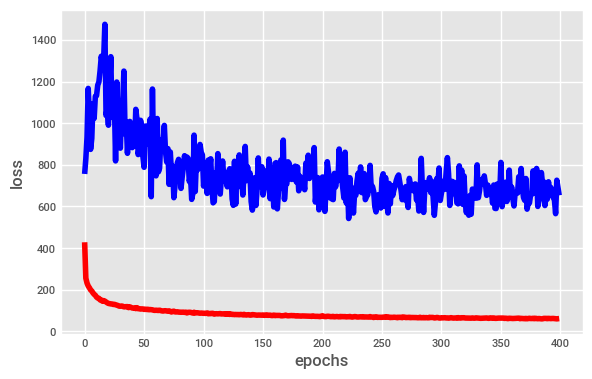

In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['loss'],'red')
plt.plot(history.history['val_loss'],'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [49]:
y_pred=model.predict(y_train)

In [50]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

15.374278990472112

**RANDOM FOREST REGRESSOR IMPLEMENTATION**

In [15]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,x_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
model.score(y_train,y_test)

0.8702302396025792

In [17]:
y_pred=model.predict(y_train)

In [18]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

156.62653753008163

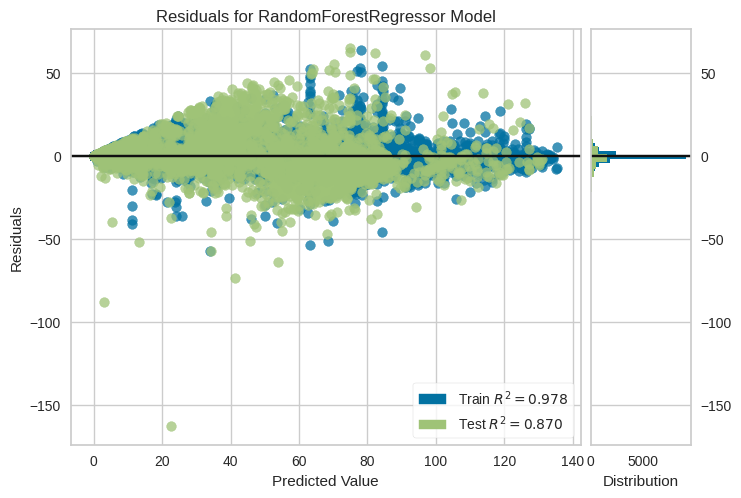

In [19]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(model)
visualizer.fit(x_train,x_test)
visualizer.score(y_train,y_test)
visualizer.poof()

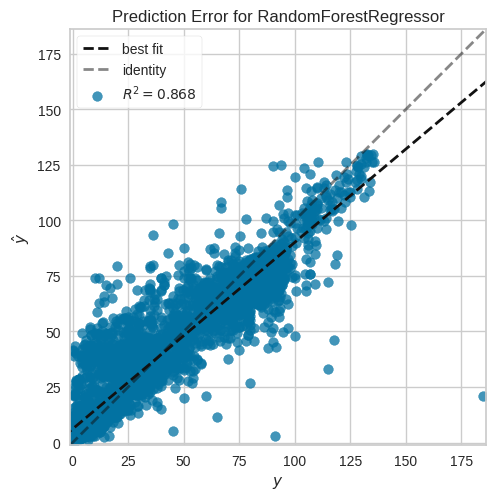

In [21]:
from yellowbrick.regressor import ResidualsPlot,PredictionError
visualizer=PredictionError(model)
visualizer.fit(x_train,x_test)
visualizer.score(y_train,y_test)
visualizer.poof()

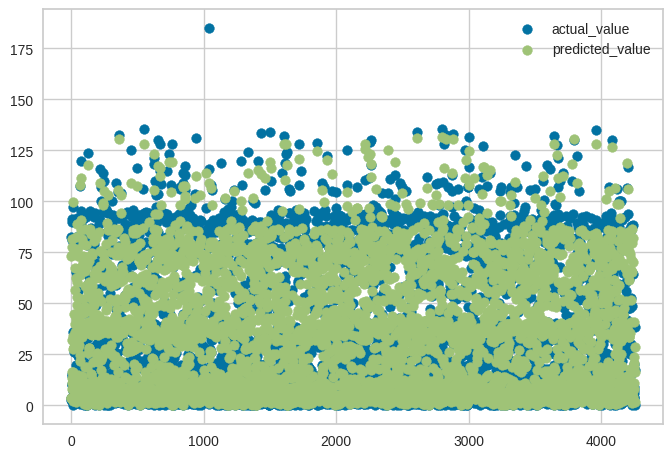

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
w=range(len(y_test))
plt.scatter(w,y_test,label='actual_value')
plt.scatter(w,y_pred,label='predicted_value')
plt.legend()
